In [1]:
import pandas as pd
import spacy 
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Pre-processing
1. Removing columns which are not needed
2. Cleaning text using spacy
3. converting text into vectors using word2vec

In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
nlp = spacy.load("en_core_web_sm")

In [8]:
#Cleaning text
def clean_text(text):
    doc = nlp(text)
    cleaned_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            cleaned_tokens.append(token.text)
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [9]:
df['cleaned_text'] = df['v2'].apply(clean_text)

In [10]:
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: [token.text for token in nlp(x)])

In [11]:
df

,v1,v2,cleaned_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy Available bugis n great wor...,"[jurong, point, crazy, Available, bugis, n, gr..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun early hor U c,"[U, dun, early, hor, U, c]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah think goes usf lives,"[Nah, think, goes, usf, lives]"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u. U won å£750 Pound ...,"[2nd, time, tried, 2, contact, u., U, won, å£7..."
5568,ham,Will Ì_ b going to esplanade fr home?,Ì b going esplanade fr home,"[Ì, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity mood suggestions,"[Pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying week...,"[guy, bitching, acted, like, interested, buyin..."


Using gensim for training word2vec from the text in the data

In [276]:
from gensim.models import Word2Vec

In [574]:
#sg=1, using skipgram instead of CBOW
model = Word2Vec(sentences=df['tokenized_text'], vector_size=20, window=7, min_count=1, sg=1)

In [575]:
model

In [576]:
model.save("spam_classifier.model")

In [577]:
#Obtaining word embeddings for the tokens
def get_average_word_embedding(tokens, model):
    valid_tokens = [token for token in tokens if token in model.wv]
    
    if not valid_tokens:
        return np.zeros(model.vector_size)
    
    embeddings = [model.wv[token] for token in valid_tokens]
    avg_embedding = np.mean(embeddings, axis=0)
    
    return avg_embedding



In [578]:
df['word_embeddings'] = df['tokenized_text'].apply(lambda x: get_average_word_embedding(x, model))

In [579]:

df

,v1,v2,cleaned_text,tokenized_text,word_embeddings,class
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy Available bugis n great wor...,"[jurong, point, crazy, Available, bugis, n, gr...","[0.005591023, -0.009304361, 0.1941696, 0.14022...",0
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[-0.032382872, 0.050584752, 0.20438838, 0.2317...",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[0.15947482, -0.053918265, 0.5213842, 0.258954...",1
3,ham,U dun say so early hor... U c already then say...,U dun early hor U c,"[U, dun, early, hor, U, c]","[-0.02320309, 0.16909455, 0.45780933, 0.290984...",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah think goes usf lives,"[Nah, think, goes, usf, lives]","[0.0016630044, -0.14553389, 0.13669881, 0.0975...",0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u. U won å£750 Pound ...,"[2nd, time, tried, 2, contact, u., U, won, å£7...","[0.02601188, 0.02583294, 0.589273, 0.38667053,...",1
5568,ham,Will Ì_ b going to esplanade fr home?,Ì b going esplanade fr home,"[Ì, b, going, esplanade, fr, home]","[-0.072388284, 0.074673764, 0.24989645, 0.1870...",0
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity mood suggestions,"[Pity, mood, suggestions]","[-0.017875627, -0.039422143, 0.08889976, 0.038...",0
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying week...,"[guy, bitching, acted, like, interested, buyin...","[0.08287271, -0.0330132, 0.2767865, 0.10582992...",0


In [580]:
df['class'] = df['v1'].apply(lambda x: 0 if x == 'ham' else 1)

In [581]:
df_final = df[['word_embeddings','class']]

In [582]:
df_final

,word_embeddings,class
0,"[0.005591023, -0.009304361, 0.1941696, 0.14022...",0
1,"[-0.032382872, 0.050584752, 0.20438838, 0.2317...",0
2,"[0.15947482, -0.053918265, 0.5213842, 0.258954...",1
3,"[-0.02320309, 0.16909455, 0.45780933, 0.290984...",0
4,"[0.0016630044, -0.14553389, 0.13669881, 0.0975...",0
...,...,...
5567,"[0.02601188, 0.02583294, 0.589273, 0.38667053,...",1
5568,"[-0.072388284, 0.074673764, 0.24989645, 0.1870...",0
5569,"[-0.017875627, -0.039422143, 0.08889976, 0.038...",0
5570,"[0.08287271, -0.0330132, 0.2767865, 0.10582992...",0


In [583]:
#Train test split
from sklearn.model_selection import train_test_split

In [584]:
X = df_final['word_embeddings']

In [585]:
y = df_final['class']

In [586]:
X= np.vstack(X)

In [587]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [588]:
#Using Dense neural network for classification task
from keras.models import Sequential
from keras.layers import Dense

In [589]:
model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [590]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [591]:
epochs = 120 
batch_size = 8
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/120
502/502 [==============================] - 2s 2ms/step - loss: 0.1924 - accuracy: 0.9307 - val_loss: 0.1742 - val_accuracy: 0.9439
Epoch 2/120
502/502 [==============================] - 1s 2ms/step - loss: 0.1319 - accuracy: 0.9524 - val_loss: 0.1700 - val_accuracy: 0.9350
Epoch 3/120
502/502 [==============================] - 1s 2ms/step - loss: 0.1280 - accuracy: 0.9554 - val_loss: 0.1774 - val_accuracy: 0.9372
Epoch 4/120
502/502 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1545 - val_accuracy: 0.9507
Epoch 5/120
502/502 [==============================] - 1s 1ms/step - loss: 0.1244 - accuracy: 0.9589 - val_loss: 0.2049 - val_accuracy: 0.9350
Epoch 6/120
502/502 [==============================] - 1s 2ms/step - loss: 0.1250 - accuracy: 0.9579 - val_loss: 0.1527 - val_accuracy: 0.9439
Epoch 7/120
502/502 [==============================] - 1s 2ms/step - loss: 0.1193 - accuracy: 0.9599 - val_loss: 0.1736 - val_accuracy: 0.9350

Epoch 58/120
502/502 [==============================] - 1s 1ms/step - loss: 0.0919 - accuracy: 0.9676 - val_loss: 0.1488 - val_accuracy: 0.9552
Epoch 59/120
502/502 [==============================] - 1s 1ms/step - loss: 0.0877 - accuracy: 0.9698 - val_loss: 0.1636 - val_accuracy: 0.9529
Epoch 60/120
502/502 [==============================] - 1s 1ms/step - loss: 0.0864 - accuracy: 0.9718 - val_loss: 0.1542 - val_accuracy: 0.9574
Epoch 61/120
502/502 [==============================] - 1s 1ms/step - loss: 0.0856 - accuracy: 0.9688 - val_loss: 0.1466 - val_accuracy: 0.9507
Epoch 62/120
502/502 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9706 - val_loss: 0.1478 - val_accuracy: 0.9574
Epoch 63/120
502/502 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9693 - val_loss: 0.1593 - val_accuracy: 0.9574
Epoch 64/120
502/502 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9723 - val_loss: 0.1559 - val_accuracy:

Epoch 115/120
502/502 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9763 - val_loss: 0.2048 - val_accuracy: 0.9462
Epoch 116/120
502/502 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9756 - val_loss: 0.1906 - val_accuracy: 0.9439
Epoch 117/120
502/502 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9776 - val_loss: 0.1771 - val_accuracy: 0.9417
Epoch 118/120
502/502 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.9778 - val_loss: 0.2022 - val_accuracy: 0.9507
Epoch 119/120
502/502 [==============================] - 1s 2ms/step - loss: 0.0591 - accuracy: 0.9791 - val_loss: 0.1842 - val_accuracy: 0.9507
Epoch 120/120
502/502 [==============================] - 1s 1ms/step - loss: 0.0586 - accuracy: 0.9786 - val_loss: 0.2122 - val_accuracy: 0.9484


In [592]:
res = model.evaluate(X_test, y_test)

35/35 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9650


In [593]:
#Generating predictions
y_train_pred = model.predict(X_train)

140/140 [==============================] - 0s 953us/step


In [594]:
#Generating ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

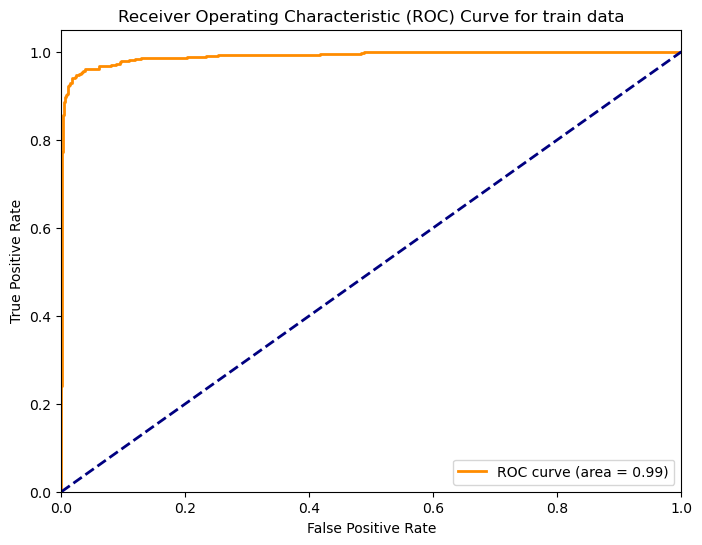

In [615]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for train data')
plt.legend(loc="lower right")
plt.show()

In [616]:
y_test_pred = model.predict(X_test)

35/35 [==============================] - 0s 1ms/step


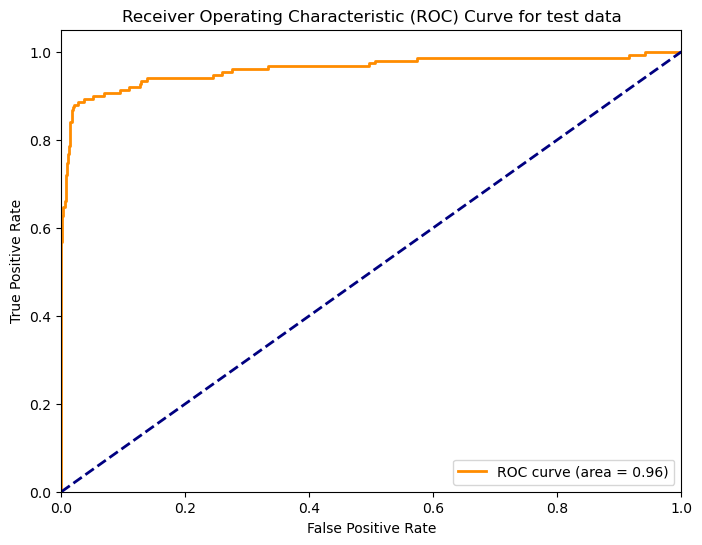

In [617]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for test data')
plt.legend(loc="lower right")
plt.show()

In [618]:
y_train_pred_labels = (y_train_pred > 0.50).astype(int)

In [619]:
y_test_pred_labels = (y_test_pred > 0.50).astype(int)

In [620]:
cm_train = confusion_matrix(y_train, y_train_pred_labels)

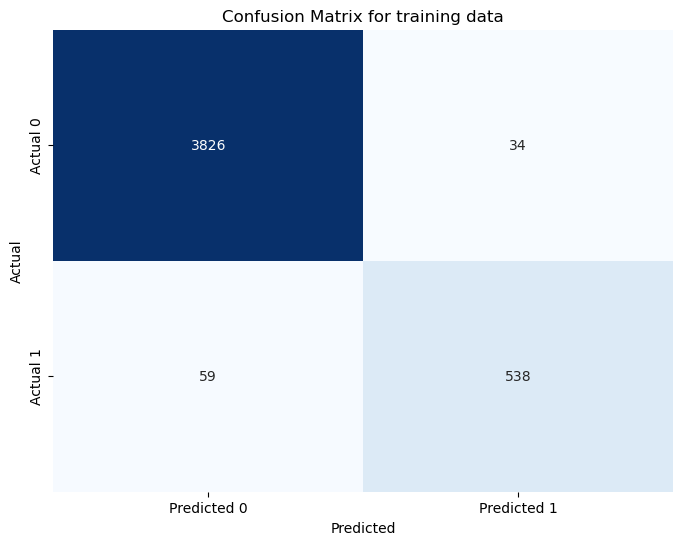

In [621]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for training data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [622]:
cm_test = confusion_matrix(y_test, y_test_pred_labels)

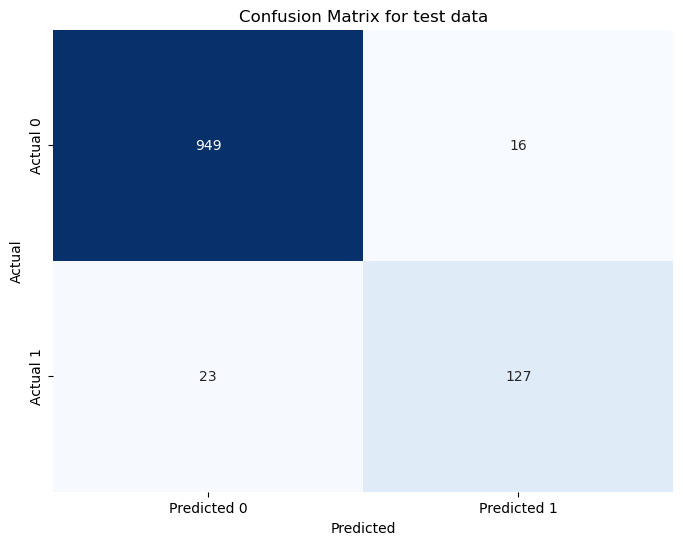

In [623]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()